# Content of this talk

- Why do you need pandas?
- Basic introduction to pandas data structures

# Why do you need pandas?

When working with *tabular or structured data* (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

## Why you should learn Pandas
As humans interact more and more with technology, vast amounts of data are being generated each day. Hence, the ability to analyse these data and draw insights from them is becoming an increasingly important skill to have in the modern workforce. Organisations are progressively turning to data to help them better understand their customers and products, analyse past trends and patterns, improve operational efficiency and so on.

Here are just some of the many reasons why you should learn pandas:

- By learning pandas, you learn the fundamental ideas behind working with data as well as some skill and knowledge to code in Python
- It is straightforward to learn and you can immediately apply it to any dataset you want
- It is commonly used in the data science and machine learning community

# Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is ``pandas``?

* Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.



* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/

## Key features

* Fast, easy and flexible input/output for a lot of different data formats
* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Powerful time series manipulation (resampling, timezones, ..)
* Easy plotting

# Basic data structures

Pandas does this through two fundamental object types, both built upon NumPy arrays: the ``Series`` object, and the ``DataFrame`` object.

### Pandas data table representation
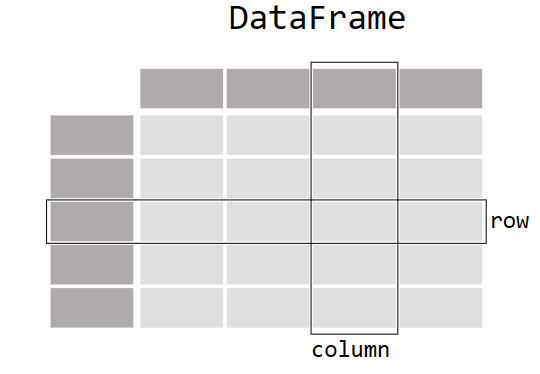

### Each column in a DataFrame is a Series

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

pd.options.display.max_rows = 8

/Users/aleesamann/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [3]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
s.values

array([0.1, 0.2, 0.3, 0.4])

We can access series values via the index, just like for NumPy arrays:

In [5]:
s[0]

0.1

Unlike the NumPy array, though, this index can be something other than integers:

In [6]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [7]:
s2['c']

2

In [8]:
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [9]:
population['France']

64.3

but with the power of numpy arrays:

In [10]:
population * 1000

Germany           81300.0
Belgium           11300.0
France            64300.0
United Kingdom    64900.0
Netherlands       16900.0
dtype: float64

We can index or slice the populations as expected:

In [11]:
population['Belgium']

11.3

In [12]:
population['Germany':'France']

Germany    81.3
Belgium    11.3
France     64.3
dtype: float64

Fancy indexing, like indexing with a list or boolean indexing:

In [13]:
population[['France', 'Netherlands']]

France         64.3
Netherlands    16.9
dtype: float64

In [14]:
population[population > 20]

Germany           81.3
France            64.3
United Kingdom    64.9
dtype: float64

Element-wise operations:

In [15]:
population / 100

Germany           0.813
Belgium           0.113
France            0.643
United Kingdom    0.649
Netherlands       0.169
dtype: float64

A range of methods:

In [16]:
population.mean()

47.739999999999995

## Alignment!
Only, pay attention to alignment: operations between series will align on the index:

In [17]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [18]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [19]:
s2

France     64.3
Germany    81.3
dtype: float64

In [20]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.


In [21]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


In [22]:
countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

To check the data types of the different columns:

In [23]:
countries.dtypes

country        object
population    float64
area            int64
capital        object
dtype: object

An overview of that information can be given with the `info()` method:

In [24]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     5 non-null      object 
 1   population  5 non-null      float64
 2   area        5 non-null      int64  
 3   capital     5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


If we don't like what the index looks like, we can reset it and set one of our columns:

In [25]:
countries = countries.set_index('country')
countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


To access a Series representing a column in the data, use typical indexing syntax:

In [26]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

Adding a new column to the dataframe is very simple:

In [27]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


We can use masking to select certain data:`

In [28]:
countries[countries['density'] > 300]

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
Netherlands,16.9,41526,Amsterdam,406.973944


One useful method to use is the ``describe`` method, which computes summary statistics for each column:es.

In [29]:
countries.describe()

,population,area,density
count,5.000000,5.000000,5.000000
mean,47.740000,269042.800000,273.183879
std,31.519645,264012.827994,123.440607
min,11.300000,30510.000000,95.783158
25%,16.900000,41526.000000,227.699202
50%,64.300000,244820.000000,265.092721
75%,64.900000,357050.000000,370.370370
max,81.300000,671308.000000,406.973944


The `plot` method can be used to quickly visualize the data in different ways:

<AxesSubplot:xlabel='country'>

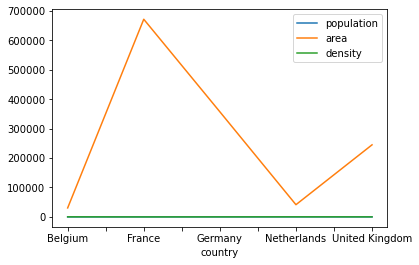

In [30]:
countries.plot()

<AxesSubplot:xlabel='country'>

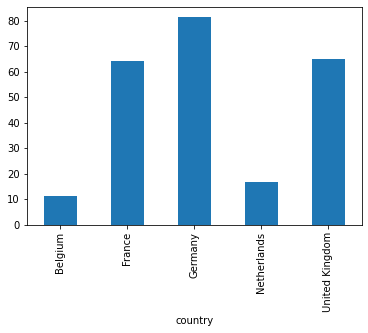

In [31]:
countries['population'].plot(kind='bar')

## Some notes on selecting data

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. We now have to distuinguish between:

- selection by label
- selection by position.

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [32]:
countries.head()

,population,area,capital,density
country,,,,
Belgium,11.3,30510,Brussels,370.370370
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


In [33]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

or multiple columns:

In [34]:
countries[['area', 'population']]

,area,population
country,,
Belgium,30510,11.3
France,671308,64.3
Germany,357050,81.3
Netherlands,41526,16.9
United Kingdom,244820,64.9


But, slicing accesses the rows:

In [35]:
countries['France':'Netherlands']

,population,area,capital,density
country,,,,
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944


For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [36]:
countries.loc['Germany', 'area']

357050

In [37]:
countries.loc['France':'Germany', :]

,population,area,capital,density
country,,,,
France,64.3,671308,Paris,95.783158
Germany,81.3,357050,Berlin,227.699202


In [38]:
countries.loc[countries['density']>300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [39]:
countries.iloc[0:2,1:3]

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris


The different indexing methods can also be used to assign data:

In [40]:
countries.loc['Belgium':'Germany', 'population'] = 10

In [41]:
countries

,population,area,capital,density
country,,,,
Belgium,10.0,30510,Brussels,370.370370
France,10.0,671308,Paris,95.783158
Germany,10.0,357050,Berlin,227.699202
Netherlands,16.9,41526,Amsterdam,406.973944
United Kingdom,64.9,244820,London,265.092721


There are many, many more interesting operations that can be done on Series and DataFrame objects, but rather than continue using this toy data, we'll instead move to a real-world example, and illustrate some of the advanced concepts along the way.

## Case Study

## Read the dataset

In [42]:
titanic = pd.read_csv("titanic.csv")

### Getting the glimpse of Data 

In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
###print first 8 rows of dataset
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [45]:
###print last 5 rows of dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [46]:
###print last 8 rows of dataset
titanic.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


## Getting detailed summary of dataframe

In [47]:
## summary of dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
###Data types of each column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

## Renaming columns

In [49]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# Suppose we want to change the names of the first two columns
titanic.rename(columns = {'Survived': 'Surv', 'Pclass': 'class'}, inplace = True)
titanic.head()

,PassengerId,Surv,class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
titanic = pd.read_csv("titanic.csv")

## Dropping columns and rows
There are a few of ways you can drop columns or rows from your dataframe. In this example, I am only focusing on the 'drop' function.

In [52]:
# Drop the 'Name' column

titanic.drop(columns = 'Name')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


In [53]:
# Drop row with id 478
titanic.drop(478)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## Subsetting data
### Selecting specific columns from data

There are two ways you can select a column of a dataframe.

- titanic.Name
- titanic['Name']

In [54]:
# Let's first try out it out on the Name feature

titanic.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
                             ...                        
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [55]:
titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
                             ...                        
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

## Index-based selection

We use iloc to select data based on their numerical position in the dataframe.

iloc takes two argument, first is row followed by column. It has a starting index of 0 that is 0 is first, 1 is second, 2 is third and so on.

In [56]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
# First row and all columns
titanic.iloc[0, :]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
                        ...           
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, Length: 12, dtype: object

In [58]:
# Fourth column that is the Name column and all rows
# Since starting index is 0 fourth column corresponds to index number 3
titanic.iloc[:, 3]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
                             ...                        
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Suppose we want to select a range of values.

iloc includes the first number but exclude the last number of the range. For example, if we want the second and third row of the first column, the code is as follows:

In [59]:
# Second and third rows of the first 
titanic.iloc[1:3, 0]

1    2
2    3
Name: PassengerId, dtype: int64

We can also pass in a list or series into iloc



In [84]:
# First three rows and all columns
titanic.iloc[[0:2,7,10], :]

SyntaxError: invalid syntax (2307610985.py, line 2)

We can also go from the bottom of the dataframe.



In [61]:
# Bottom five rows of the dataframe
titanic.iloc[-5:, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Label-based selection

With loc we need to specify the actual name of the column.



In [62]:
# First row of the Name column
titanic.loc[0, 'Name']

'Braund, Mr. Owen Harris'

### Different to iloc, when we want to select a range of values, loc includes both the start as well as the end of the range.

For example, to get the first 5 rows under `iloc` we would have `titanic[:5]` whereas for `loc` we have `titanic[:4]` instead.





In [63]:
# First 5 rows of the Name, Sex and Age column
titanic.loc[:4, ['Name', 'Sex', 'Age']]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0


## Conditional Selection

In [64]:
# Rows with age 50
titanic.loc[titanic['Age'] == 50, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
...,...,...,...,...,...,...,...,...,...,...,...,...
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S


In [65]:
# Rows with age 50 AND are female
# This is a subset of the above dataframe by filtering out females
titanic.loc[(titanic['Age'] == 50) & (titanic['Sex'] == 'female') ,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S


In [66]:
# Rows with age 50 OR have fare greater than or equal to 200
titanic.loc[(titanic['Age'] == 50) | (titanic['Fare'] >= 200), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
...,...,...,...,...,...,...,...,...,...,...,...,...
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S


In [67]:
# All the rows with null cabin column
titanic.loc[titanic['Cabin'].isnull(), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## Summary statistics for Data

In [68]:
###Mean age of passengers
titanic["Age"].mean()

29.69911764705882

In [69]:
###Median age and fare
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [70]:
###Detailed summary statistics
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Aggregating statistics (usually for categorical variables)

### Aggregating for single variable/column

In [71]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
### Compute mean of Age by Sex
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

### Aggregating by multiple columns

In [73]:
### Compute mean age of passengers grouped by class
titanic[["Age", "Pclass"]].groupby("Pclass").mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [74]:
### Compute mean age of passengers grouped by sex
titanic[["Age", "Sex"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


### Count the number of categorical variables


In [75]:
### Number of passengers in each class
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [76]:
### Number of males and females
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## Combining Dataframes

When working with multiple datasets during a project, there will come a point where you might wish to merge your dataframes together to have a better view and understanding of your data.

In this tutorial, we will cover two pandas functions, and they are `concat and merge` that are used to combine dataframes.

## Concat

Concat is short for concatenate. This function allows to stack two separate dataframes both vertically and horizontally.

Let's observe this with an example.

In [77]:
df1 = pd.DataFrame({'Name': ['Vicky', 'Bill'], 'Age': [12, 46]})
df2 = pd.DataFrame({'Name': ['John', 'Sabrina'], 'Age': [37, 25]})
df1

,Name,Age
0,Vicky,12
1,Bill,46


In [78]:
df2

,Name,Age
0,John,37
1,Sabrina,25


There is an argument called axis within the concat function that you can use to specify which way you would like to stack your dataframe. 1 means horizontal whereas 0 means vertical. If you do not specify, pandas assumes 0 as its default.

In [79]:
# Concat horizontally
pd.concat([df1, df2], axis = 1)

,Name,Age,Name,Age
0,Vicky,12,John,37
1,Bill,46,Sabrina,25


In [80]:
# Concat vertically and ignore index
df3 = pd.concat([df1, df2], axis = 0)
df3

,Name,Age
0,Vicky,12
1,Bill,46
0,John,37
1,Sabrina,25


There is another argument called `join` which allows you to stack dataframes only based on the columns shared by two dataframes.



In [81]:
df4 = pd.DataFrame({'Name': ['Tyler', 'Natalie'], 'Age': [28, 39], 'Hobby': ['Swimming', 'Reading']})
df4

,Name,Age,Hobby
0,Tyler,28,Swimming
1,Natalie,39,Reading


In [82]:
# Outer is the default for the join argument
pd.concat([df3, df4], join = 'outer', ignore_index = True)

,Name,Age,Hobby
0,Vicky,12,NaN
1,Bill,46,NaN
2,John,37,NaN
3,Sabrina,25,NaN
4,Tyler,28,Swimming
5,Natalie,39,Reading


Outer does not consider any differences in columns between two dataframe. Because df3 does not have a hobby column, pandas will automatically fill them with null values.

In [83]:
# Inner stacks only the columns that are shared between the two dataframes
pd.concat([df3, df4], join = 'inner', ignore_index = True)

,Name,Age
0,Vicky,12
1,Bill,46
2,John,37
3,Sabrina,25
4,Tyler,28
5,Natalie,39


## Additional Resources for learning Pandas
- https://github.com/TirendazAcademy/PANDAS-TUTORIAL
- https://www.youtube.com/playlist?list=PL1xVF1dBM4bmy13VIiL0mD8mZQ40XePWw
- https://github.com/tommyod/awesome-pandas